# 3. ニューラルネットワーク

## 3.1 パーセプトロンからニューラルネットワークへ

パーセプトロンとニューラルネットワークはニューロンのつなぎ方は同じであるが、ニューラルネットワークはどのように信号を伝達しているか？

バイアス(b)：ニューロンの発火のしやすさを調節する

活性化関数(h)：入力信号の総和がどのように発火するかを決定する

パーセプトロン：複数の信号を入力として受け取り、一つの信号を出力する。

## 3.2 活性化関数

ニューラルネットワークの世界は活性化関数をステップ関数（0-1で決めること）から別の関数に変更すること

ステップ関数の実装とグラフ描画

C:\Users\81804\AppData\Local\Temp/ipykernel_29572/1728274567.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)  # ブーリアンからintへの変換


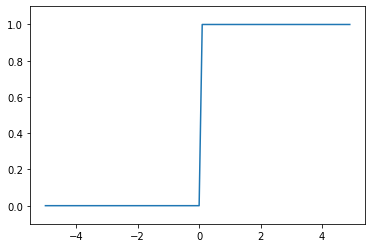

In [13]:
# --*- coding;utf-8 -*-

# ステップ関数

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

step_function(3.0)

# NumPy配列に対応した実装

import numpy as np

def step_function(x):
    y = x > 0  # ブーリアン配列の生成
    return y.astype(np.int)  # ブーリアンからintへの変換

step_function(np.array([-1.0, 1.0, 2.0]))

# グラフ描画

import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)  # -5.0～5.0までの範囲を0.1刻みの配列
y = step_function(x)  # 上で定義済み
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y軸の範囲を指定
plt.show()

シグモイド関数の実装とグラフ描画

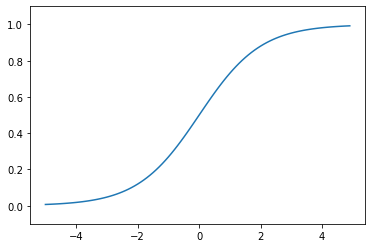

In [15]:
# -*- coding;utf-8 -*-

# シグモイド関数の実装

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])

sigmoid(x)  # NumPyブロードキャストによりスカラ値とNumPy配列の各要素が計算される

# グラフ描画
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

ステップ関数とシグモイド関数は滑らかさが異なるが、値の入力が小さければ0に近い値を、大きければ1に近い値を出力する。また、出力信号の値が0～1に押し込めるのも共通点である。

ステップ関数とシグモイド関数は非線形関数である。ニューラルネットワークを多層にすることの利点を活かすためには、活性化関数に非線形関数を利用する必要がある。

ReLU（Rectified Linear Unit）関数：入力が0を超えていればそのまま入力を出力し、0以下ならば0を出力する。

In [16]:
# -*- coding:utf-8 -*-

# ReLU関数の実装

def relu(x):
    return np.maximum(0, x)

## 3.3 多次元配列の計算

NumPyの多次元配列を使った計算をマスターすると、ニューラルネットワークの実装を効率的に進められる。

In [18]:
# ２次元配列(行列)

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
np.ndim(B)  # 次元数
B.shape  # 形状

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

In [22]:
# 行列の積

# 例①

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result_1 = np.dot(A, B)

# np.dot(B, A)とnp.dot(A, B)の計算結果は異なる

result_2 = np.dot(B, A)

print(result_1)
print(result_2)

# 例②  Aの1次元目とBの0次元目の要素数は合わせる 出力の形状は(Aの0次元目の要素数, Bの1次元目の要素数)

A = np.array([[1, 2, 3], [4, 5, 6]])   # shape(2, 3)
B = np.array([[1, 2], [3, 4], [5, 6]])  # shape(3, 2)

np.dot(A, B)

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


array([[22, 28],
       [49, 64]])

ニューラルネットワークの行列の積

In [24]:
# 上記の特徴を踏まえてニューラルネットワークの計算を行列の積で行う(入力(X)と重み(W)の計算)

X = np.array([1, 2])  # 入力 (1, 2)
W = np.array([[1, 3, 5], [2, 4, 6]]) #　重み (2, 3)  
Y = np.dot(X, W)  # 出力(1, 3)

print(Y)

[ 5 11 17]


## 3.4 3層ニューラルネットワークの実装

ニューラルネットワークの各層の計算は行列の計算としてまとめて行える。

w(1)12：第１層目の重み　次層１番目のニューロン、前層２番目のニューロン

$a1 = w(1)11 \times 1 + w(1)12x2 + b(1)1$

行列の積で第１層目の重み付き和を表す

A(1) = XW(1) + B(1)

In [33]:
# -*- coding:utf-8 -*-

X = np.array([1.0, 0.5])  # 入力  (1, 2)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 重み  (2, 3)
B1 = np.array([0.1, 0.2, 0.3])  # バイアス  (1, 3)

A1 = np.dot(X, W1) + B1  # 重み付き和  (1, 3)

# 活性化関数で変換

Z1 = sigmoid(A1)  # (1, 3)

# 第１層目から第２層目までの実装

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 重み(3, 2)
B2 = np.array([0.1, 0.2])  # バイアス (1, 2)

A2 = np.dot(Z1, W2) + B2  # 重み付き和(1, 2)

# 活性化関数で変換

Z2 = sigmoid(A2)  # (1, 2)

# 第２層目から出力層への信号の伝達　最後の活性化関数は恒等関数を用いる

# 恒等関数の実装
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])  # 重み(2, 2)
B3 = np.array([0.1, 0.2])  # バイアス (1, 2)

A3 = np.dot(Z2, W3) + B3 # 重み付き和 (1, 2)

# 活性化関数で変換
Y = identity_function(A3)  # (1, 2)

# 結果の確認
print(Y)

[0.31682708 0.69627909]


init_network(), forward()という２つの関数を使って上記の流れを実装する

init_newwork() : 重みとバイアスの初期化

forward() : 入力信号が出力へと変換されるプロセスをまとめて実装

In [35]:
# -*- coding:utf-8 -*-

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)  # 結果の確認

[0.31682708 0.69627909]


## 3.5 出力層の設計

ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる。出力層の活性化関数は回帰問題なら恒等関数、分類問題ならソフトマックス関数が一般的に用いられる。

恒等関数：入力信号をそのまま出力するだけ

ソフトマックス関数：分子が入力信号akの指数関数、分母はすべての入力信号の指数関数の和で構成される。

In [41]:
# -*- coding:utf-8 -*-

# ソフトマックス関数の実装

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)  # 分子に当たる部分、指数関数

sum_exp_a = np.sum(exp_a)  # 分母に当たる部分、指数関数

y = exp_a / sum_exp_a  # 式

# 結果の確認
print(y)

# 後でソフトマックス関数を呼び出せるように関数で定義する

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

[0.01821127 0.24519181 0.73659691]


ソフトマックス関数実装上の注意

指数関数は、用意に大きな値をとるのでオーバーフロー対策が必要になる。

In [44]:
# 正しく計算されない例

a = np.array([1010, 1000, 990])
error = np.exp(a) / np.sum(np.exp(a))

print(error)

# オーバーフロー対策、入力信号の中の最大値を書く要素から引く

c = np.max(a)

y = np.exp(a-c) / np.sum(np.exp(a-c))

print(y)

# オーバーフロー対策を施したソフトマックス関数を定義する
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)  # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_ab
    
    return y

[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\81804\AppData\Local\Temp/ipykernel_29572/737771465.py:4: RuntimeWarning: overflow encountered in exp
  error = np.exp(a) / np.sum(np.exp(a))
C:\Users\81804\AppData\Local\Temp/ipykernel_29572/737771465.py:4: RuntimeWarning: invalid value encountered in true_divide
  error = np.exp(a) / np.sum(np.exp(a))


ソフトマックス関数の出力は0～1.0の間の実数になり、出力の総和が１になる。この性質によってソフトマックス関数の出力は確率として解釈することができる。

ソフトマックス関数を適用しても各要素の大小は変わらない。ニューラルネットワークのクラス分類では一般的に、出力の最も出力の大きいニューロンに相当するクラスが認識結果になるため、出力層のソフトマックス関数は省略できる。

出力層のニューロンの数は解くべき問題に応じて適宜決める必要がある。

例えばクラス分類を行う問題であれば、出力層のニューロンの数は分類したいクラスの数に設定するのが一般的である。

## 3.6 手書き数字認識

学習済みのパラメータを使用して推論処理を行う。ここで行う推論処理はニューラルネットワークの順方向伝播という。

使用するデータセットはMNISTという手書き数字の画像セット。

In [1]:
# -*- coding:utf-8 -*-

import sys, os
sys.path.append(os.pardir)
from mnist import load_mnist

# load_mnist 関数は (訓練画像, 訓練ラベル), (テスト画像, テストラベル) の形式でMNISTデータを返す

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 引数について
# normalize= : 入力画像を0.0～1.0の値に正規化するかどうかを設定する
# flatten= : 入力画像を平らな一次元配列にするかどうかを設定する
# one-hot-label= : ラベルをone-hot-labelにするかどうかを設定する

# それぞれのデータの形状を出力
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# -*- coding;utf-8 -*-

# MNIST画像を表示
import numpy as np

from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))  # NumPy配列のデータをPIL用のデータオブジェクトに変換する
    pil_img.show()  # 画像の表示
    
img = x_train[0]
label = t_train[0]  # 5


# flatten=True によりこの時点でimgは( 1, 784) の形状
img = img.reshape(28, 28)  # 形状を元の画像サイズに変換する

# img_show() の引数にimg を入れて呼び出し、画像を表示する
img_show(img)

MNIST データセットに対して、推論処理を行うニューラルネットワークを実装する。

入力層：784 (28 * 28), 出力層：10（数字0～9の10クラス分類のため）, 隠れ層2つ（任意に設定可能）：1. 50個、2. 100個

使用する関数：get_data(), init_network(), predict()

In [83]:
import pickle
import pandas as pd

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    test = pd.read_pickle("C:\\Users\\81804\\Document\\programs\\python\\slds\\夏休み課題\\sample_weight.pkl")
    # メモ；vscode では本書のコードどおりにpickleファイルを読み込みロードできたが、jupyterではできなかった。
    #       pickleをpandasで読み込むと行ける記事を見つけたのでそれで解決した。
    
    network = test
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

# 認識精度の評価

x, t = get_data()
network = init_network()

print(network)  # network の中身を見てみる

accuracy_cnt = 0

for i in range(len(x)):  # for文をテスト画像の数だけ回す
    y = predict(network, x[i])  # 一つずつ推論する
    p = np.argmax(y)  # 最も確率の高い要素のインデックスを取得 softmax 関数の出力を確率として考える
    if p == t[i]:  # 出力されたpがラベルと同じなら
       accuracy_cnt += 1  # 正解した数のカウントを増やす

# 精度の出力

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

Accuracy:0.9352


上のニューラルネットワークの各層の重みの形状を確認する。

In [99]:
# -*- coding:utf-8 -*-

x, _ = get_data()  # x, _ = (テスト画像,テストラベル)
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)  # テスト画像データ全体の形状
print(x[0].shape)  # テスト画像データ1枚分の形状
print(W1.shape)  # 重み１の形状
print(W2.shape) # 重み２の形状
print(W3.shape) # 重み３の形状

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


最後にバッチ処理を実装する。

バッチ処理はコンピュータで計算する上で大きな利点がある。これはバッチ処理によって、１枚あたりの処理時間を大幅に短縮できること。数値計算を扱うライブラリは大きな配列の計算を効率良くできるように最適化が行われている。大きな配列を一気に計算するほうが、分割した小さい配列を少しずつ計算するよりも早く計算ができるようになっている。

In [103]:
# -*- coding:utf-8 -*-

# バッチ処理の実装

x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # スタート、ストップ、ステップ
    x_batch = x[i:i+batch_size]  # iの値からバッチサイズ１００を足した要素数
    y_batch = predict(network, x_batch)  # 第２引数が今までは画像１枚分だったのに対して１００枚分になる
    p = np.argmax(y_batch, axis=1)     # １次元目を軸として最大値のインデックスを見つける（要素数１００の一次元配列）
    accuracy_cnt += np.sum(p == t[i:i+batch_size])  # ()内のTrueの数を数える。p.shape=(100,), t.shape(100,)

print("Accuracy:" +str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 3.7 まとめ

ニューラルネットワークでは、活性化関数としてシグモイド関数やReLU関数のような滑らかに変化する関数を利用する。

NumPyの多次元配列をうまく使うことで、ニューラルネットワークを効率よく実装することができる。

機械学習の問題は、回帰問題と分類問題に大別できる。

出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトマックス関数を一般的に利用する。

分類問題では、出力層のニューロンの数を分類するクラス数に設定する。

入力データのまとまりをバッチといい、バッチ単位で推論処理を行うことで、計算を高速に行う。